<a href="https://www.kaggle.com/code/abhikuks/pca-step-by-step-demo-for-beginners?scriptVersionId=99854239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# Going to work with Only train data 
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv') 

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

- ***So there are 785 features thats alot of features, now this is the curse of dimensionality and we need to reduce this using dimensionality reduction techniques like Tsne,PCA; here I'm going to use PCA {Principal Component Analysis}.***

- ***Let's ask the question or try to understand why there are so many features , so this is because of there are pictures and each picture is of 28*28 pixels which equals to 784 pixels; they made each pixel a column and first column is the label/target feature which tells us about what digit is in the image.There are 42000 such images , I hope you got the gist of it.***

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21048,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Let me show you how this label is connected using matplotlib***

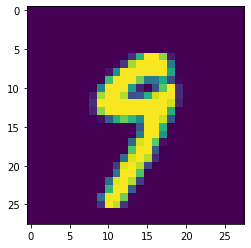

In [6]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[30421,1:].values.reshape(28,28))

## ***Now I'll run the machine learning algorithm and see how things go without any dimensionality reduction***

In [7]:
X= df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
X_train.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [11]:
# NO missing data , YAY this is a perfect data

from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier() # using default settings

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

- ***The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.***

- ***So when I'll write knn.predit, it's going to take more time because what I am saying to KNN is to compute the distances from a given point to other points (almost 33.5k ) then sort them to know who are the nearest neighbors and use their label that too in 784 dimensional space.***


In [14]:
import time 
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

11.659091711044312


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
# It's not bad but lets use PCA and gain this much accuracy with less no of columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# ***Step 1 Standardize the data (Not mandatory but gives better results)***

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***Step 2 Getting the Eigen vectors and values***

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100 ) # gettng 100 principal components

In [19]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
X_train_trf.shape

(33600, 100)

# ***Step 3: Training the data***

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [23]:
start = time.time()
y_pred = knn.predict(X_test_trf)
print(time.time() - start)

6.019803762435913


In [24]:
accuracy_score(y_test ,y_pred)

0.9533333333333334

- ***Lets understand now , when we started there were 784 dimensions and when we applied same settings with everything on 100 dimensions which we got using PCA , we got a little less accuracy but we saved computation(time) and dimensionality space is reduced as well. win-win for us.***

- ***Now I'll loop in through multiple ranges / no of dimensions to know how many components are best for this.***

In [25]:
for i in range(1,36):
    pca =PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf =pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    acc_score = accuracy_score(y_test,y_pred)
    print(f'Accuracy with {i} Components is {acc_score}')

Accuracy with 1 Components is 0.25845238095238093
Accuracy with 2 Components is 0.32392857142857145
Accuracy with 3 Components is 0.5103571428571428
Accuracy with 4 Components is 0.666547619047619
Accuracy with 5 Components is 0.7383333333333333
Accuracy with 6 Components is 0.8227380952380953
Accuracy with 7 Components is 0.8438095238095238
Accuracy with 8 Components is 0.8720238095238095
Accuracy with 9 Components is 0.8863095238095238
Accuracy with 10 Components is 0.9053571428571429
Accuracy with 11 Components is 0.911547619047619
Accuracy with 12 Components is 0.9179761904761905
Accuracy with 13 Components is 0.9285714285714286
Accuracy with 14 Components is 0.9345238095238095
Accuracy with 15 Components is 0.9383333333333334
Accuracy with 16 Components is 0.9378571428571428
Accuracy with 17 Components is 0.9404761904761905
Accuracy with 18 Components is 0.9413095238095238
Accuracy with 19 Components is 0.9423809523809524
Accuracy with 20 Components is 0.9441666666666667
Accuracy 

***Now we can see that gradually the accuracy increases and after some principal components it remains same , so we need to find that optimum number but before that let's visualize.***

## ***Second thing for which PCA used is Visualization***

In [26]:
# Transforming it into a 2D coordinate system
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit(X_test)

In [27]:
X_train_trf

array([[-2.71853087, -0.48981957],
       [-0.67691517, -6.75402897],
       [-3.03323878,  6.50986628],
       ...,
       [ 2.1488206 ,  0.78068299],
       [ 1.05964878,  0.94771161],
       [17.70268912,  1.96154422]])

In [28]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x= X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

***Isn't it beautiful , Now we can easily visualize and because of the power of plotly we can even interact with it , I love doing that but still alot og points are overalapped , so let's get this in 3D.***

In [29]:
# Transforming it into a 3D coordinate system
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit(X_test)

In [30]:
X_train_trf

array([[-2.71865   , -0.48964344,  1.1351416 ],
       [-0.67698745, -6.75349355, -2.33685374],
       [-3.03323828,  6.50969178,  7.49263369],
       ...,
       [ 2.14887392,  0.78063884, -0.74738035],
       [ 1.0595662 ,  0.94758152,  3.94993208],
       [17.70258681,  1.962159  , -4.94566537]])

In [31]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df , x= X_train_trf[:,0],
                 y = X_train_trf[:,1],z = X_train_trf[:,2],
                 color = y_train_trf)
fig.update_layout(margin = dict(l=20,r=20,t=20,b=20))
fig.show()

***Just WOW and you can understand alot of different patterns in data using the interactive plot***

In [32]:
pca.explained_variance_   ## Top 3 Eigen values 

array([692.55228737, 139.53877134,  41.34548255])

In [33]:
pca.components_  ##Eigen vectors

array([[-5.68330484e-25,  7.44919402e-28,  5.74527037e-27, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.23489709e-20,  4.28083093e-23,  4.02726511e-22, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.37782585e-19,  2.30930487e-18,  1.58068566e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [34]:
pca.components_.shape ##3 vectors with 784 shape

(3, 784)

In [35]:
pca.explained_variance_ratio_ * 100 ## this gives us the percentage of variance each eigen value have 

array([44.08541304,  8.88254141,  2.63190622])

## ***Let's find out the optimum number of principal components***

In [36]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit(X_test)

In [37]:
pca.explained_variance_.shape

(784,)

In [38]:
pca.components_.shape

(784, 784)

In [39]:
pca.explained_variance_ratio_

array([4.40854130e-01, 8.88254141e-02, 2.63190623e-02, 1.86157979e-02,
       1.74700328e-02, 1.62098131e-02, 1.31478863e-02, 1.15233292e-02,
       1.00489759e-02, 8.85046974e-03, 8.24429346e-03, 7.41444388e-03,
       7.06481442e-03, 6.62723499e-03, 6.58124174e-03, 6.32964080e-03,
       5.93594815e-03, 5.83019972e-03, 5.63196074e-03, 5.54500120e-03,
       5.24201298e-03, 5.05469785e-03, 4.90648150e-03, 4.83042084e-03,
       4.68048667e-03, 4.51565703e-03, 4.41262453e-03, 4.09597656e-03,
       4.03773467e-03, 3.91515054e-03, 3.79534483e-03, 3.68174773e-03,
       3.51897665e-03, 3.38347337e-03, 3.30251117e-03, 3.22730991e-03,
       3.13613942e-03, 3.02779414e-03, 2.93955646e-03, 2.84054728e-03,
       2.82222423e-03, 2.80518467e-03, 2.69552057e-03, 2.65916251e-03,
       2.64513621e-03, 2.53917205e-03, 2.49073584e-03, 2.46844629e-03,
       2.44032277e-03, 2.36825107e-03, 2.32908082e-03, 2.27841255e-03,
       2.20937828e-03, 2.17092729e-03, 2.11906907e-03, 2.09272372e-03,
      

***Now I'll do cumulative sum on this till I get the 90 percent***

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44085413, 0.52967954, 0.55599861, 0.5746144 , 0.59208444,
       0.60829425, 0.62144214, 0.63296547, 0.64301444, 0.65186491,
       0.66010921, 0.66752365, 0.67458846, 0.6812157 , 0.68779694,
       0.69412658, 0.70006253, 0.70589273, 0.71152469, 0.71706969,
       0.7223117 , 0.7273664 , 0.73227288, 0.7371033 , 0.74178379,
       0.74629945, 0.75071207, 0.75480805, 0.75884578, 0.76276093,
       0.76655628, 0.77023803, 0.773757  , 0.77714048, 0.78044299,
       0.7836703 , 0.78680644, 0.78983423, 0.79277379, 0.79561433,
       0.79843656, 0.80124174, 0.80393726, 0.80659643, 0.80924156,
       0.81178074, 0.81427147, 0.81673992, 0.81918024, 0.82154849,
       0.82387757, 0.82615598, 0.82836536, 0.83053629, 0.83265536,
       0.83474808, 0.83683309, 0.83886351, 0.84081051, 0.84275011,
       0.84466232, 0.84653634, 0.84838243, 0.85016293, 0.85193234,
       0.85369586, 0.85541788, 0.85708229, 0.85872741, 0.86035976,
       0.86193664, 0.86350778, 0.86506727, 0.86657887, 0.86807

Text(0, 0.5, 'Variance Explained')

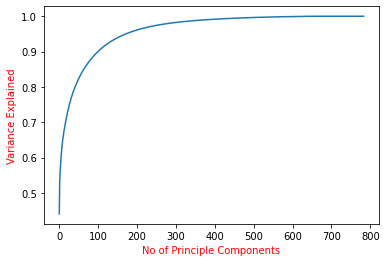

In [41]:
plt. plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Principle Components' ,color ='red')
plt.ylabel('Variance Explained' ,color ='red')

***Now around (200~250) we get 90 %***

# ***Thanks for giving it a read , Do upvote it if you learned something out of it.***

### Advantages of PCA:

- ***Easy to compute. PCA is based on linear algebra, which is computationally easy to solve by computers.***

- ***Speeds up other machine learning algorithms. Machine learning algorithms converge faster when trained on principal components instead of the original dataset.***

- ***Counteracts the issues of high-dimensional data. High-dimensional data causes regression-based algorithms to overfit easily. By using PCA beforehand to lower the dimensions of the training dataset, we prevent the predictive algorithms from overfitting.*** 

### Disadvantages of PCA:

- ***Low interpretability of principal components. Principal components are linear combinations of the features from the original data, but they are not as easy to interpret. For example, it is difficult to tell which are the most important features in the dataset after computing principal components.** *

- ***The trade-off between information loss and dimensionality reduction. Although dimensionality reduction is useful, it comes at a cost. Information loss is a necessary part of PCA. Balancing the trade-off between dimensionality reduction and information loss is unfortunately a necessary compromise that we have to make when using PCA.***